In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import assessment
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn.model_selection import cross_val_score
import assessment

In [3]:
refls = np.loadtxt('../../EMIT-scenes/refl_2k.txt')
wv = np.loadtxt('../../EMIT-scenes/wv_2k.txt')
df = pd.DataFrame(refls)
df['wv'] = wv
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
X_train.shape

(7000, 285)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

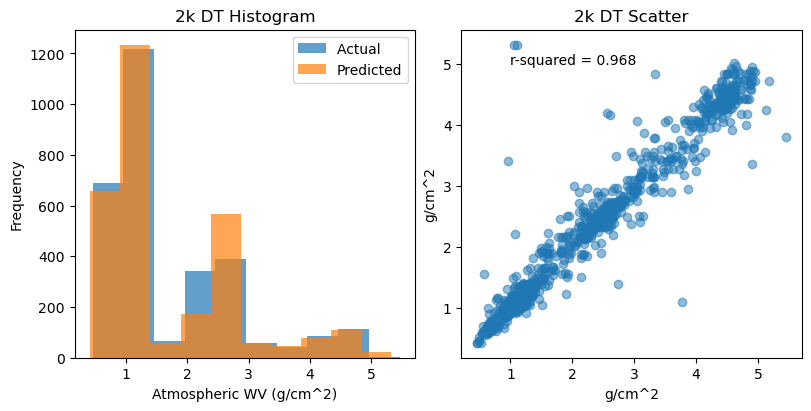

In [4]:
assessment.plot_hist_and_scatter(y_test, y_pred, '2k DT Histogram', '2k DT Scatter')

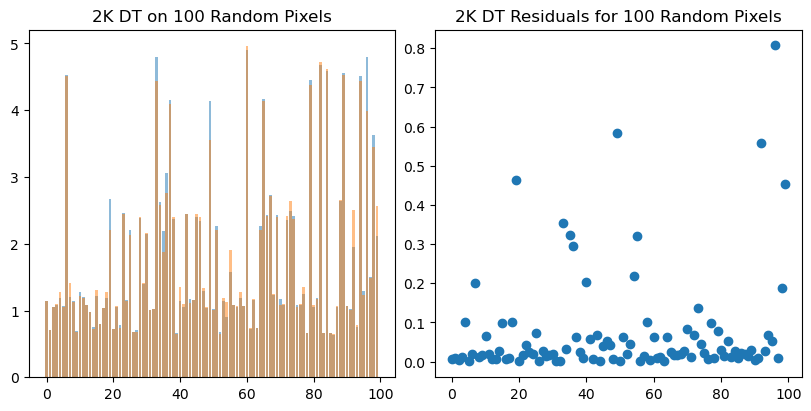

In [5]:
indices = np.random.randint(0, y_test.shape[0], 100)
test, pred = assessment.random_select(y_test, y_pred, indices)
assessment.plot_bar_and_residuals(test, pred, '2K DT on 100 Random Pixels', '2K DT Residuals for 100 Random Pixels')

rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
import pickle
file_name = '../default_scikit_rfr2k.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(rf, file)

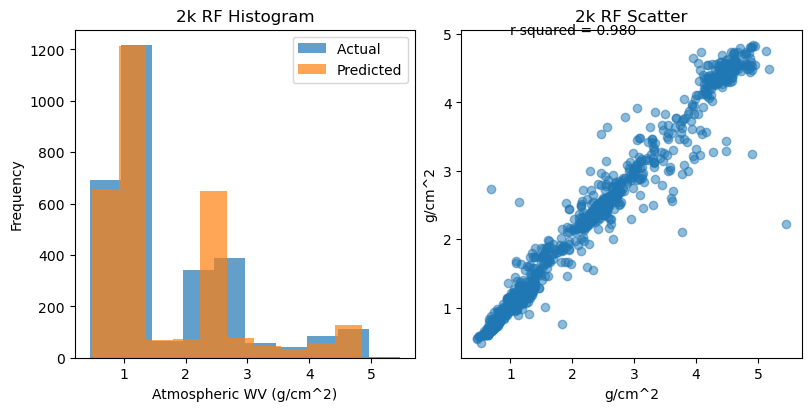

In [6]:
file_name = '../default_scikit_rfr.pkl'
with open(file_name, 'rb') as f:
    rf = pickle.load(f)
y_pred = rf.predict(X_test)
assessment.plot_hist_and_scatter(y_test, y_pred, '2k RF Histogram', '2k RF Scatter')

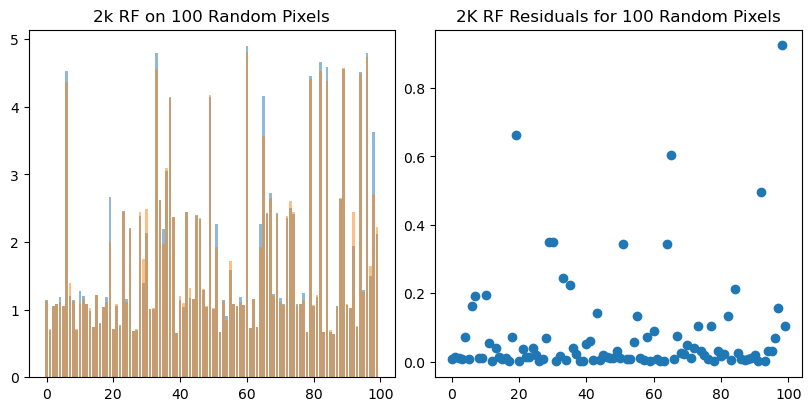

In [7]:
test, pred = assessment.random_select(y_test, y_pred, indices)
assessment.plot_bar_and_residuals(test, pred, '2k RF on 100 Random Pixels', '2K RF Residuals for 100 Random Pixels')

In [4]:
refls.shape

(10000, 285)

In [7]:
shortened_refls = refls[:, 60:100].copy()

In [9]:
shortened_refls.shape

(10000, 40)

In [11]:
df_short = pd.DataFrame(shortened_refls)
df_short['wv'] = wv
X = df_short.iloc[:, :-1]
y = df_short.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
X_train.shape

(7000, 40)

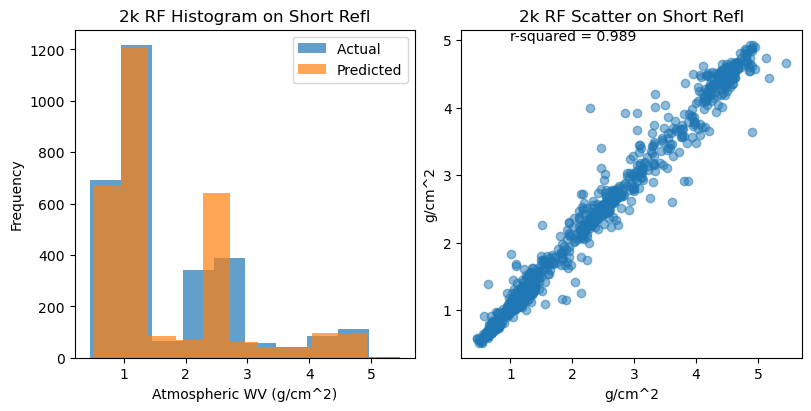

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
assessment.plot_hist_and_scatter(y_test, y_pred, '2k RF Histogram on Short Refl', '2k RF Scatter on Short Refl')